In [26]:
import json
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
import matplotlib.pyplot as plt

from sklearn import metrics
from sentence_transformers import SentenceTransformer
from torch.nn import functional as F

# 70. Generating Features through Word Vector Summation

In [2]:
DATA_PATH = "../chapter06/text/"
MODEL = SentenceTransformer('all-MiniLM-L6-v2')
CATEGORY_TO_INDEX = {
    "b" : 0,
    "t" : 1,
    "e" : 2,
    "m" : 3
}

def _generate_features(data_type: str) -> list:
    dataset = pd.read_csv(f"{DATA_PATH}{data_type}.txt", sep="\t")
    df = pd.DataFrame(dataset)
    y = list(df[df.columns[1]].map(CATEGORY_TO_INDEX))
    sentences = list(df[df.columns[0]])
    sentence_embeddings = MODEL.encode(sentences)
    x = []
    for embedding in sentence_embeddings:
        xi = embedding / len(embedding)
        x.append(xi)
    return x, y

x_train, y_train = _generate_features("train")
x_valid, y_valid = _generate_features("valid")
x_test, y_test = _generate_features("test")

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
def _save_data(name: str, x: list, y: list) -> None:
    torch.save(x, f"data/{name}.feature_matrix.pt")
    torch.save(y, f"data/{name}.label_vector.pt")
        
_save_data("train", x_train, y_train)
_save_data("valid", x_valid, y_valid)
_save_data("test", x_test, y_test)

# 71. Building Single Layer Neural Network

In [4]:
def _load_data(name: str) -> list:
    x = torch.from_numpy(np.array(torch.load(f"data/{name}.feature_matrix.pt")))
    y = torch.from_numpy(np.array(torch.load(f"data/{name}.label_vector.pt")))
    return x, y

x_train, y_train = _load_data("train")
x_valid, y_valid = _load_data("valid")
x_test, y_test = _load_data("test")

In [5]:
print(x_train[:2])

tensor([[-8.7899e-05,  3.6016e-05,  6.6271e-05,  1.6554e-05,  8.1709e-05,
         -1.6398e-04, -1.0694e-04,  3.8124e-05, -4.0722e-05,  1.5640e-05,
          5.9334e-05,  1.5015e-04,  6.9028e-05,  9.5005e-06, -2.3751e-05,
          3.6679e-05, -1.7564e-04, -1.4351e-04, -7.3044e-05,  1.0945e-04,
         -2.6269e-04,  9.5159e-06,  2.2117e-04, -4.8098e-05,  2.0771e-04,
         -8.2889e-05, -6.5250e-05,  1.1368e-04, -1.1842e-04,  9.0210e-05,
          1.4703e-04,  1.0929e-04,  6.9705e-05,  2.2680e-04,  1.0840e-04,
         -6.7918e-05,  2.7577e-04, -3.2303e-05,  7.2200e-05,  2.6124e-05,
          3.8294e-05, -3.0205e-04,  4.5588e-05,  4.1950e-05,  1.1088e-04,
          2.7532e-04,  1.2823e-04, -4.1185e-05, -9.9267e-05,  1.0803e-04,
         -2.2030e-04, -9.9785e-07, -7.5704e-05,  2.5365e-04, -1.6787e-04,
          8.0811e-05,  3.8581e-05,  4.8124e-06,  1.7912e-04,  6.0507e-05,
         -3.1754e-05, -3.6642e-05, -1.9131e-05,  9.5693e-05, -2.5362e-05,
          2.9074e-04, -4.6591e-05,  5.

In [6]:
print(y_train[:2])

tensor([1, 2])


In [7]:
L = 4
d = len(x_train[0])
linear_nn = torch.nn.Linear(d, L)

In [8]:
x1 = x_train[0]
W = torch.randn(4, len(x1))
result_x1 = linear_nn(x1)
y1_hat = torch.softmax(result_x1, dim=-1)
print("x1 = ", x1, "\n")
print("W = ", W, "\n")
print("y1_hat = ", y1_hat, "\n")

x1 =  tensor([-8.7899e-05,  3.6016e-05,  6.6271e-05,  1.6554e-05,  8.1709e-05,
        -1.6398e-04, -1.0694e-04,  3.8124e-05, -4.0722e-05,  1.5640e-05,
         5.9334e-05,  1.5015e-04,  6.9028e-05,  9.5005e-06, -2.3751e-05,
         3.6679e-05, -1.7564e-04, -1.4351e-04, -7.3044e-05,  1.0945e-04,
        -2.6269e-04,  9.5159e-06,  2.2117e-04, -4.8098e-05,  2.0771e-04,
        -8.2889e-05, -6.5250e-05,  1.1368e-04, -1.1842e-04,  9.0210e-05,
         1.4703e-04,  1.0929e-04,  6.9705e-05,  2.2680e-04,  1.0840e-04,
        -6.7918e-05,  2.7577e-04, -3.2303e-05,  7.2200e-05,  2.6124e-05,
         3.8294e-05, -3.0205e-04,  4.5588e-05,  4.1950e-05,  1.1088e-04,
         2.7532e-04,  1.2823e-04, -4.1185e-05, -9.9267e-05,  1.0803e-04,
        -2.2030e-04, -9.9785e-07, -7.5704e-05,  2.5365e-04, -1.6787e-04,
         8.0811e-05,  3.8581e-05,  4.8124e-06,  1.7912e-04,  6.0507e-05,
        -3.1754e-05, -3.6642e-05, -1.9131e-05,  9.5693e-05, -2.5362e-05,
         2.9074e-04, -4.6591e-05,  5.9422e-06

In [9]:
X1_to_4 = x_train[:4]
result_1_to_4 = linear_nn(X1_to_4)
Y_hat = torch.softmax(result_1_to_4, dim=-1)
print("X1_to_4 = ", X1_to_4, "\n")
print("Y_hat = ", Y_hat, "\n")

X1_to_4 =  tensor([[-8.7899e-05,  3.6016e-05,  6.6271e-05,  ..., -2.0765e-04,
         -2.9862e-04,  3.0951e-04],
        [-2.1624e-04, -9.4935e-05,  8.9859e-05,  ..., -1.7898e-04,
          4.4618e-05, -4.3245e-05],
        [-1.3177e-04,  2.3720e-04,  3.1202e-05,  ...,  6.7066e-06,
         -1.4341e-04, -1.4693e-04],
        [ 3.3781e-06, -3.2162e-05,  1.0769e-04,  ..., -1.0235e-04,
          4.3635e-04,  1.0801e-04]]) 

Y_hat =  tensor([[0.2455, 0.2377, 0.2572, 0.2596],
        [0.2455, 0.2377, 0.2572, 0.2596],
        [0.2455, 0.2377, 0.2572, 0.2596],
        [0.2455, 0.2377, 0.2572, 0.2596]], grad_fn=<SoftmaxBackward0>) 



# 72. Calculating loss and gradients

In [10]:
def _calculate_loss(tensor_in: object, tensor_out, name:str) -> None:
    entropy = nn.CrossEntropyLoss()
    loss = entropy(tensor_in, tensor_out)
    print(f"Loss {name} = ", loss, "\n")
    loss.backward()

_calculate_loss(linear_nn(x_train[:1]), y_train[:1], "x1")
_calculate_loss(linear_nn(x_train[:4]), y_train[:4], "X1_to_4")

Loss x1 =  tensor(1.4366, grad_fn=<NllLossBackward0>) 

Loss X1_to_4 =  tensor(1.4089, grad_fn=<NllLossBackward0>) 



In [11]:
def _calculate_grad(tensor: object, name:str) -> None:
    print(f"Grad {name} = ", torch.gradient(tensor), "\n")

_calculate_grad(linear_nn(x_train[0]), "x1")
_calculate_grad(linear_nn(x_train[:4]), "X1_to_4")

Grad x1 =  (tensor([-0.0321,  0.0232,  0.0439,  0.0092], grad_fn=<CatBackward0>),) 

Grad X1_to_4 =  (tensor([[ 1.2866e-04, -4.3306e-05, -9.6869e-05,  4.2196e-05],
        [ 7.5818e-05, -4.3226e-05, -2.6561e-06,  3.1639e-05],
        [-3.0814e-05,  7.1060e-06,  8.0405e-05,  6.6178e-05],
        [-8.4605e-05,  5.7358e-05,  6.9253e-05,  1.1127e-04]],
       grad_fn=<CatBackward0>), tensor([[-0.0321,  0.0232,  0.0439,  0.0092],
        [-0.0323,  0.0231,  0.0439,  0.0094],
        [-0.0324,  0.0232,  0.0440,  0.0093],
        [-0.0322,  0.0232,  0.0440,  0.0093]], grad_fn=<CatBackward0>)) 



# 73. Learning with stochastic gradient descent

In [13]:
def _calculate_loss(x: object, y: object, loss_fn: object, model: object = linear_nn) -> int:
    loss = loss_fn(model(x), y)
    loss.backward()
    return loss.item()

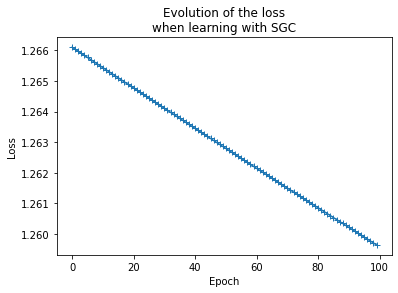

In [21]:
EPOCHS = 100
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear_nn.parameters(), lr=1e-3)
losses = []

for i in range(EPOCHS):
    optimizer.zero_grad()
    losses.append(_calculate_loss(x_train, y_train, loss_fn))
    optimizer.step()
    
plt.plot(losses, marker="+")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Evolution of the loss\nwhen learning with SGC")
plt.show()

# 74. Measuring accuracy

In [15]:
def _calculate_accuracy(x: object, y: object, model: object = linear_nn) -> int:
    #BUG: y_pred doesn't change
    y_pred = model(x).detach().numpy()
    return metrics.accuracy_score(y, np.argmax(y_pred, axis=1))

In [16]:
print("Accuracy for the Training Data:", _calculate_accuracy(x_train, y_train))
print("Accuracy for the Valid Data:", _calculate_accuracy(x_valid, y_valid))

Accuracy for the Training Data: 0.5406622516556291
Accuracy for the Valid Data: 0.5233050847457628


# 75. Plotting loss and accuracy

In [17]:
def _display_loss_acc(EPOCHS: int,
                      losses_train: list,
                      losses_valid: list,
                      accuracies_train: list,
                      accuracies_valid: list) -> None:
    LENGTH = range(EPOCHS)

    fig, ax = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

    ax[0].plot(LENGTH, losses_train, color="blue", label="Loss Train")
    ax[0].plot(LENGTH, losses_valid, color="red", label="Loss Valid")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")
    ax[0].legend()

    ax[1].plot(LENGTH, accuracies_train, color="blue", label="Accuracy Train")
    ax[1].plot(LENGTH, accuracies_valid, color="red", label='Accuracy Valid')
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].legend()

    plt.show()

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear_nn.parameters(), lr=1e-3)

EPOCHS = 3000

losses_train = []
accuracies_train = []
losses_valid = []
accuracies_valid = []

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    
    losses_train.append(_calculate_loss(x_train, y_train, loss_fn))
    losses_valid.append(_calculate_loss(x_valid, y_valid, loss_fn))
    
    accuracies_train.append(_calculate_accuracy(x_train, y_train))
    accuracies_valid.append(_calculate_accuracy(x_valid, y_valid))
    
    optimizer.step()

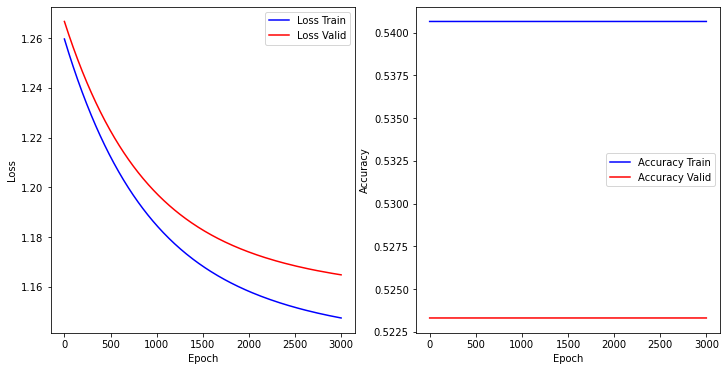

In [23]:
_display_loss_acc(EPOCHS, losses_train, losses_valid, accuracies_train, accuracies_valid)

# 76. Checkpoints

## Checkpoints should include values of the parameters such as weight matrices and the internal states of the optimization algorithm.

In [64]:
def _save_checkpoints(epoch: int, W, model, optimizer, PATH: str) -> None:
    torch.save({
            "epoch": epoch,
            "weight_matrix" : W,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            }, PATH)

In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear_nn.parameters(), lr=1e-3)

EPOCHS = 1000
PATH = "data/checkpoints.pt"

losses_train = []
accuracies_train = []
losses_valid = []
accuracies_valid = []

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    
    losses_train.append(_calculate_loss(x_train, y_train, loss_fn))
    losses_valid.append(_calculate_loss(x_valid, y_valid, loss_fn))
    
    accuracies_train.append(_calculate_accuracy(x_train, y_train))
    accuracies_valid.append(_calculate_accuracy(x_valid, y_valid))
    
    _save_checkpoints(epoch, W, linear_nn, optimizer, PATH)
    
    optimizer.step()

# 77. Mini-batches

In [67]:
def _display_epoch_data(batch_size: int,
                        losses_train: list,
                        losses_valid: list,
                        accuracies_train: list,
                        accuracies_valid:  list) -> None:
    print("BATCH_SIZE : ",  batch_size)
    print("\tLoss Train : ",  losses_train)
    print("\tLoss Valid : ",  losses_valid)
    print("\tAccuracy Train : ",  accuracies_train)
    print("\tAccuracy Valid : ",  accuracies_valid)
    print()

In [73]:
def _iterate_through_loader(optimizer, loader, loss_fn, model = linear_nn) -> tuple:
    loss_epoch = 0
    accuracy_epoch = []
    
    for step, (batch_x, batch_y) in enumerate(loader):
            optimizer.zero_grad()
            loss = _calculate_loss(batch_x, batch_y, loss_fn, model)
            loss_epoch += loss
            accuracy = _calculate_accuracy(batch_x, batch_y, model)
            accuracy_epoch.append(accuracy)

    return loss_epoch, accuracy_epoch

In [74]:
torch.manual_seed(1)

BATCH_SIZES = [1, 2, 4, 8, 16]
EPOCHS = 1

for current_batch_size in BATCH_SIZES:
    
    %%time

    PATH = f"data/batch_size{current_batch_size}.checkpoints.pt"

    losses_train = []
    accuracies_train = []
    losses_valid = []
    accuracies_valid = []

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(linear_nn.parameters(), lr=1e-3)
    torch_dataset = Data.TensorDataset(x_train, y_train)
    loader = Data.DataLoader(dataset = torch_dataset,
                            batch_size = current_batch_size,
                            shuffle = True)

    for epoch in range(EPOCHS):
        
        loss_epoch, accuracy_epoch = _iterate_through_loader(optimizer, loader, loss_fn)
        
        loss_epoch = loss_epoch / len(loader)
        losses_train.append(loss_epoch)
        losses_valid.append(_calculate_loss(x_valid, y_valid, loss_fn))

        accuracies_train.append(np.mean(accuracy_epoch))
        accuracies_valid.append(_calculate_accuracy(x_valid, y_valid))

        _save_checkpoints(epoch, W, linear_nn, optimizer, PATH)

        optimizer.step()
    
    _display_epoch_data(current_batch_size, losses_train, losses_valid, accuracies_train, accuracies_valid)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs
BATCH_SIZE :  1
	Loss Train :  [1.1364112382061433]
	Loss Valid :  [1.1562323570251465]
	Accuracy Train :  [0.5406622516556291]
	Accuracy Valid :  [0.5233050847457628]

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 10 µs
BATCH_SIZE :  2
	Loss Train :  [1.1364072677157573]
	Loss Valid :  [1.156239628791809]
	Accuracy Train :  [0.5406622516556291]
	Accuracy Valid :  [0.5233050847457628]

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 11 µs
BATCH_SIZE :  4
	Loss Train :  [1.1362683558047324]
	Loss Valid :  [1.1562469005584717]
	Accuracy Train :  [0.5407838983050848]
	Accuracy Valid :  [0.5233050847457628]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
BATCH_SIZE :  8
	Loss Train :  [1.1364761222848447]
	Loss Valid :  [1.1562544107437134]
	Accuracy Train :  [0.5406073446327684]
	Accuracy Valid :  [0.5233050847457628]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
BATCH_SIZ

# 78. Training on a GPU

In [75]:
torch.cuda.is_available()

False

In [76]:
device = torch.device("cuda:4" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [77]:
torch.cuda.manual_seed_all(1)

x_train = x_train.to(device)
y_train = y_train.to(device)
x_valid = x_valid.to(device)
y_valid = y_valid.to(device)
linear_nn = linear_nn.to(device)

In [78]:
def _neural_network(model, x_train, y_train, x_valid, y_valid) -> None:
    BATCH_SIZES = [1, 2, 4, 8, 16]
    EPOCHS = 1
    
    for current_batch_size in BATCH_SIZES:

        %%time

        PATH = f"data/{device}.batch_size{current_batch_size}.checkpoints.pt"

        losses_train = []
        accuracies_train = []
        losses_valid = []
        accuracies_valid = []

        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
        torch_dataset = Data.TensorDataset(x_train, y_train)
        loader = Data.DataLoader(dataset = torch_dataset,
                                batch_size = current_batch_size,
                                shuffle = True,
                                pin_memory=True)

        for epoch in range(EPOCHS):

            loss_epoch, accuracy_epoch = _iterate_through_loader(optimizer, loader, loss_fn, model)

            loss_epoch = loss_epoch / len(loader)
            losses_train.append(loss_epoch)
            losses_valid.append(_calculate_loss(x_valid, y_valid, loss_fn, model))

            accuracies_train.append(np.mean(accuracy_epoch))
            accuracies_valid.append(_calculate_accuracy(x_valid, y_valid, model))

            _save_checkpoints(epoch, W, model, optimizer, PATH)

            optimizer.step()
        _display_epoch_data(current_batch_size, losses_train, losses_valid, accuracies_train, accuracies_valid)

In [ ]:
_neural_network(linear_nn, x_train, y_train, x_valid, y_valid)

# 79. Multilayer Neural Networks

In [81]:
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        self.twolayernet = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        y_pred = self.twolayernet(x)
        return y_pred

In [84]:
multi_linear_nn = TwoLayerNet(d, 300, L)
optimizer = torch.optim.SGD(multi_linear_nn.parameters(), lr=1e-3)
_neural_network(multi_linear_nn, x_train, y_train, x_valid, y_valid)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 9.06 µs
BATCH_SIZE :  1
	Loss Train :  [1.3835650777658879]
	Loss Valid :  [1.3837693929672241]
	Accuracy Train :  [0.07682119205298013]
	Accuracy Valid :  [0.0815677966101695]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
BATCH_SIZE :  2
	Loss Train :  [1.3830283382870503]
	Loss Valid :  [1.383263111114502]
	Accuracy Train :  [0.07682119205298013]
	Accuracy Valid :  [0.0815677966101695]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
BATCH_SIZE :  4
	Loss Train :  [1.3829437517008538]
	Loss Valid :  [1.3831696510314941]
	Accuracy Train :  [0.07680084745762712]
	Accuracy Valid :  [0.0815677966101695]

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs
BATCH_SIZE :  8
	Loss Train :  [1.3828436914136855]
	Loss Valid :  [1.3830764293670654]
	Accuracy Train :  [0.07680084745762712]
	Accuracy Valid :  [0.0815677966101695]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 